📌Dataset Overview: five interrelated tables

The tables are described as follows:

1. Customers Table:

○ customer_id: Unique identifier for each customer.

○ join_date: The date the customer joined.

○ city_id: The ID representing the customer's city.

○ gender_id: The ID representing the customer's gender.

2. Genders Table:

○ gender_id: Unique identifier for each gender.

○ gender_name: Name of the gender (e.g., male, female).

3. Cities Table:

○ city_id: Unique identifier for each city.

○ city_name: Name of the city.

4. Transactions Table:

○ transaction_id: Unique identifier for each coupon transaction.

○ customer_id: ID of the customer who performed the transaction.

○ transaction_date: The date the coupon was claimed.

○ transaction_status: Status of the coupon (e.g., claimed, burnt).

○ coupon_name: The name of the coupon.

○ burn_date: The date the coupon was burnt.

○ branch_id: ID of the branch where the coupon was burnt.

5. Branches Table:

○ branch_id: Unique identifier for each branch.

○ merchant_id: ID of the merchant who owns the branch.

6. Merchants Table:

○ merchant_id: Unique identifier for each merchant.

○ merchant_name: Name of the merchant.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:

try:
  excel_file = "E-commerce_data.xlsx"
  xl = pd.ExcelFile(excel_file)
  print(xl.sheet_names)

except FileNotFoundError:
  print(f"Error: File '{excel_file}' not found.")
except Exception as e:
  print(f"An error occurred: {e}")


['customers', 'genders', 'cities', 'transactions', 'branches', 'merchants']


In [47]:

customers = pd.read_excel(excel_file, sheet_name='customers')
genders = pd.read_excel(excel_file, sheet_name='genders')
cities = pd.read_excel(excel_file, sheet_name='cities')
transactions = pd.read_excel(excel_file, sheet_name='transactions')
branches = pd.read_excel(excel_file, sheet_name='branches')
merchants = pd.read_excel(excel_file, sheet_name='merchants')


In [48]:
customers

,customer_id,join_date,city_id,gender_id
0,1,2022-01-08,7,1
1,2,2023-05-02,20,2
2,3,2023-05-14,15,1
3,4,2022-11-25,11,2
4,5,2023-04-26,8,1
...,...,...,...,...
995,996,2022-10-28,3,1
996,997,2022-07-07,20,2
997,998,2024-03-09,11,2
998,999,2022-07-16,6,1


# Data discovery

In [49]:
customers['customer_id'].nunique()

1000

In [50]:
customers.head()

,customer_id,join_date,city_id,gender_id
0,1,2022-01-08,7,1
1,2,2023-05-02,20,2
2,3,2023-05-14,15,1
3,4,2022-11-25,11,2
4,5,2023-04-26,8,1


In [51]:
genders

,gender_id,gender_name
0,1,Male
1,2,Female


In [52]:
# create mapping between gender_id and gender_name

gender_mapping = dict(zip(genders['gender_id'], genders['gender_name']))
gender_mapping


{1: 'Male', 2: 'Female'}

In [53]:
cities

,city_id,city_name
0,1,Cairo
1,2,Alexandria
2,3,Giza
3,4,Shubra El-Kheima
4,5,Port Said
5,6,Suez
6,7,Mansoura
7,8,El-Mahalla El-Kubra
8,9,Tanta
9,10,Asyut


In [54]:

# create mapping between city_id and city_name
city_mapping = dict(zip(cities['city_id'], cities['city_name']))
city_mapping


{1: 'Cairo',
 2: 'Alexandria',
 3: 'Giza',
 4: 'Shubra El-Kheima',
 5: 'Port Said',
 6: 'Suez',
 7: 'Mansoura',
 8: 'El-Mahalla El-Kubra',
 9: 'Tanta',
 10: 'Asyut',
 11: 'Ismailia',
 12: 'Fayyum',
 13: 'Zagazig',
 14: 'Damietta',
 15: 'Aswan',
 16: 'Minya',
 17: 'Damanhur',
 18: 'Beni Suef',
 19: 'Qena',
 20: 'Sohag'}

In [55]:
branches

,branch_id,merchant_id
0,1,11
1,2,18
2,3,8
3,4,15
4,5,9
5,6,15
6,7,7
7,8,20
8,9,13
9,10,13


In [56]:
merchants

,merchant_id,merchant_name
0,1,Rivas Group
1,2,Peters-Acosta
2,3,"Duran, Perry and Stout"
3,4,Morton Ltd
4,5,Curtis-Fields
5,6,Armstrong-Gutierrez
6,7,Berry-Anderson
7,8,Medina-Foster
8,9,"Campbell, Shaffer and Martinez"
9,10,"Adams, Cruz and Williams"


In [57]:

# create mapping between merchant_id and merchant_name
merchant_mapping = dict(zip(merchants['merchant_id'], merchants['merchant_name']))
merchant_mapping


{1: 'Rivas Group',
 2: 'Peters-Acosta',
 3: 'Duran, Perry and Stout',
 4: 'Morton Ltd',
 5: 'Curtis-Fields',
 6: 'Armstrong-Gutierrez',
 7: 'Berry-Anderson',
 8: 'Medina-Foster',
 9: 'Campbell, Shaffer and Martinez',
 10: 'Adams, Cruz and Williams',
 11: 'Smith, Lawson and Hernandez',
 12: 'Cox, Rhodes and Taylor',
 13: 'Thomas-Nelson',
 14: 'Douglas Inc',
 15: 'Butler-Gomez',
 16: 'Pierce and Sons',
 17: 'Lane, Keller and Davis',
 18: 'Lewis LLC',
 19: 'Nelson, Keith and Nelson',
 20: 'Griffin-Leblanc'}

In [58]:
transactions

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6
...,...,...,...,...,...,...,...
4995,4996,776,2024-03-20,subscribed,OSq-518,NaT,1
4996,4997,583,2024-06-27,subscribed,FsJ-607,NaT,2
4997,4998,504,2022-11-08,burned,WcY-330,2022-12-06,2
4998,4999,876,2024-05-05,burned,bgx-731,2024-07-29,7


# ***cleaning data***

- we have now three tables to consider branches, customers , transactions.

- with three mappings : merchant_mapping, city_mapping, gender_mapping

In [59]:
merchant_mapping , city_mapping , gender_mapping

({1: 'Rivas Group',
  2: 'Peters-Acosta',
  3: 'Duran, Perry and Stout',
  4: 'Morton Ltd',
  5: 'Curtis-Fields',
  6: 'Armstrong-Gutierrez',
  7: 'Berry-Anderson',
  8: 'Medina-Foster',
  9: 'Campbell, Shaffer and Martinez',
  10: 'Adams, Cruz and Williams',
  11: 'Smith, Lawson and Hernandez',
  12: 'Cox, Rhodes and Taylor',
  13: 'Thomas-Nelson',
  14: 'Douglas Inc',
  15: 'Butler-Gomez',
  16: 'Pierce and Sons',
  17: 'Lane, Keller and Davis',
  18: 'Lewis LLC',
  19: 'Nelson, Keith and Nelson',
  20: 'Griffin-Leblanc'},
 {1: 'Cairo',
  2: 'Alexandria',
  3: 'Giza',
  4: 'Shubra El-Kheima',
  5: 'Port Said',
  6: 'Suez',
  7: 'Mansoura',
  8: 'El-Mahalla El-Kubra',
  9: 'Tanta',
  10: 'Asyut',
  11: 'Ismailia',
  12: 'Fayyum',
  13: 'Zagazig',
  14: 'Damietta',
  15: 'Aswan',
  16: 'Minya',
  17: 'Damanhur',
  18: 'Beni Suef',
  19: 'Qena',
  20: 'Sohag'},
 {1: 'Male', 2: 'Female'})

In [60]:
# data info , null chech , duplicates check for each table

def data_info_null_duplicates(df, table_name):
  """
  Prints data information, null checks, and duplicate checks for a given DataFrame.

  Args:
      df: The pandas DataFrame to analyze.
      table_name: The name of the table (for printing purposes).
  """
  print(f"--- {table_name} ---")
  print("Data Info:")
  print(df.info())
  print("\nNull Value Counts:")
  print(df.isnull().sum())
  print("\nDuplicate Rows:")
  print(df[df.duplicated()])
  print("-" * 40)


# Call the function for each DataFrame
data_info_null_duplicates(customers, "Customers")
data_info_null_duplicates(transactions, "Transactions")
data_info_null_duplicates(branches, "Branches")


--- Customers ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  1000 non-null   int64         
 1   join_date    1000 non-null   datetime64[ns]
 2   city_id      1000 non-null   int64         
 3   gender_id    1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB
None

Null Value Counts:
customer_id    0
join_date      0
city_id        0
gender_id      0
dtype: int64

Duplicate Rows:
Empty DataFrame
Columns: [customer_id, join_date, city_id, gender_id]
Index: []
----------------------------------------
--- Transactions ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id 

OBSERVATION: ***transactions null values detected***

In [61]:
transactions['transaction_status'].value_counts()

,count
transaction_status,
burned,2516
subscribed,2484


In [62]:

# Check the status of rows with nulls in 'burn_date'
null_burn_date_status = transactions[transactions['burn_date'].isnull()]['transaction_status']
print(null_burn_date_status.value_counts())


transaction_status
subscribed    2484
Name: count, dtype: int64


means these copouns are not burned so no burn date ,so no drop.

it likely means that the customer claimed the coupon but hasn't used it yet. In other words, they’ve shown interest but haven’t completed the action of redeeming it.

In [63]:
print(transactions['transaction_status'].value_counts())
print(transactions['transaction_id'].nunique())
print(transactions['customer_id'].nunique())
print(transactions['coupon_name'].nunique())
print(transactions['branch_id'].nunique())

transaction_status
burned        2516
subscribed    2484
Name: count, dtype: int64
5000
989
5000
10


# ***merge tables:***

In [64]:

# Add merchant_id column to transactions table
transactions = pd.merge(transactions, branches[['branch_id', 'merchant_id']], on='branch_id', how='left')

# Add merchant_name column to transactions table using the mapping
transactions['merchant_name'] = transactions['merchant_id'].map(merchant_mapping)


In [65]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      5000 non-null   int64         
 1   customer_id         5000 non-null   int64         
 2   transaction_date    5000 non-null   datetime64[ns]
 3   transaction_status  5000 non-null   object        
 4   coupon_name         5000 non-null   object        
 5   burn_date           2516 non-null   datetime64[ns]
 6   branch_id           5000 non-null   int64         
 7   merchant_id         5000 non-null   int64         
 8   merchant_name       5000 non-null   object        
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 351.7+ KB


In [66]:

# Add city_name column to customers table using the mapping
customers['city_name'] = customers['city_id'].map(city_mapping)

# Add gender_name column to customers table using the mapping
customers['gender_name'] = customers['gender_id'].map(gender_mapping)



In [67]:
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  1000 non-null   int64         
 1   join_date    1000 non-null   datetime64[ns]
 2   city_id      1000 non-null   int64         
 3   gender_id    1000 non-null   int64         
 4   city_name    1000 non-null   object        
 5   gender_name  1000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 47.0+ KB


In [68]:
# save each table in sheet on one excel

from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows # Import the missing function

# Create a new Excel workbook
wb = Workbook()

# Function to save a DataFrame to a sheet in the workbook
def save_df_to_sheet(df, sheet_name):
    ws = wb.create_sheet(sheet_name)
    for r in dataframe_to_rows(df, index=False, header=True):
        ws.append(r)

# Save each DataFrame to a separate sheet
save_df_to_sheet(customers, 'customers')

save_df_to_sheet(transactions, 'transactions')


# Remove the default sheet
del wb['Sheet']

# Save the workbook
wb.save("E-commerce.xlsx")


In [69]:
# now read the data to confirm it is saved right

import pandas as pd

try:
    customers = pd.read_excel('E-commerce.xlsx', sheet_name='customers')
    transactions = pd.read_excel('E-commerce.xlsx', sheet_name='transactions')
    print(transactions.head())
    print("---------------------------------------------------------------------------------------------")
    print(customers.head())
except FileNotFoundError:
    print("Error: Downloaded file not found. Check the file path and name.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")


   transaction_id  customer_id transaction_date transaction_status  \
0               1          733       2024-05-11         subscribed   
1               2          631       2023-05-15             burned   
2               3          309       2022-11-13         subscribed   
3               4          695       2024-01-26         subscribed   
4               5          288       2022-10-12             burned   

  coupon_name  burn_date  branch_id  merchant_id  \
0     uNY-568        NaT          7            7   
1     kBx-219 2023-06-04          5            9   
2     PLG-122        NaT          7            7   
3     Wzf-897        NaT          2           18   
4     qGb-428 2022-11-20          6           15   

                    merchant_name  
0                  Berry-Anderson  
1  Campbell, Shaffer and Martinez  
2                  Berry-Anderson  
3                       Lewis LLC  
4                    Butler-Gomez  
--------------------------------------------------

# EDA

In [70]:
customers.columns

Index(['customer_id', 'join_date', 'city_id', 'gender_id', 'city_name',
       'gender_name'],
      dtype='object')

In [71]:
transactions.columns

Index(['transaction_id', 'customer_id', 'transaction_date',
       'transaction_status', 'coupon_name', 'burn_date', 'branch_id',
       'merchant_id', 'merchant_name'],
      dtype='object')

In [72]:

# Get the maximum and minimum transaction dates
max_transaction_date = transactions['transaction_date'].max()
min_transaction_date = transactions['transaction_date'].min()

print(f"Maximum transaction date: {max_transaction_date}")
print(f"Minimum transaction date: {min_transaction_date}")

# Get the maximum and minimum join dates
max_join_date = customers['join_date'].max()
min_join_date = customers['join_date'].min()

print(f"Maximum join date: {max_join_date}")
print(f"Minimum join date: {min_join_date}")


Maximum transaction date: 2024-07-14 00:00:00
Minimum transaction date: 2021-08-05 00:00:00
Maximum join date: 2024-07-13 00:00:00
Minimum join date: 2021-07-18 00:00:00


In [73]:

# Split 'join_date' into three columns: year, month, and day
customers[['join_year', 'join_month', 'join_day']] = customers['join_date'].astype(str).str.split('-', expand=True)


In [74]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  1000 non-null   int64         
 1   join_date    1000 non-null   datetime64[ns]
 2   city_id      1000 non-null   int64         
 3   gender_id    1000 non-null   int64         
 4   city_name    1000 non-null   object        
 5   gender_name  1000 non-null   object        
 6   join_year    1000 non-null   object        
 7   join_month   1000 non-null   object        
 8   join_day     1000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 70.4+ KB


# 1. Customer Demographics Analysis:


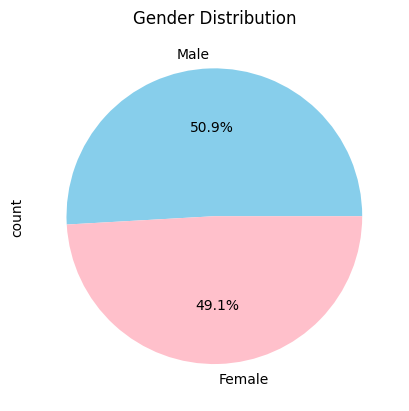

In [75]:
# 1. Customer Demographics
# Gender Distribution
gender_dist = customers['gender_name'].value_counts()
gender_dist.plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution', colors=['skyblue', 'pink'])
plt.show()

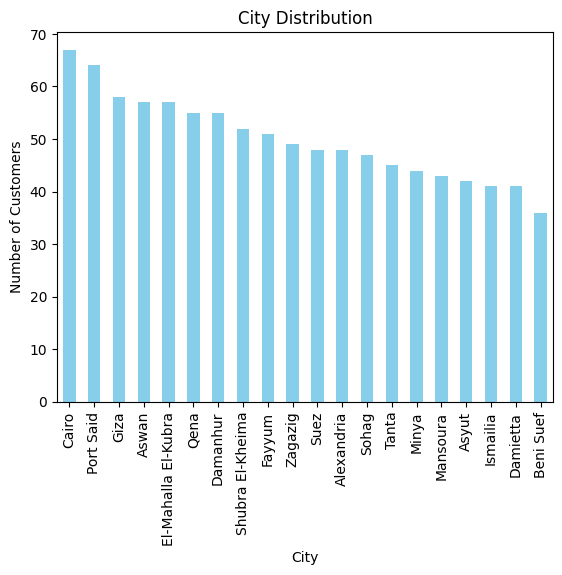

In [76]:
# City Distribution
city_dist = customers['city_name'].value_counts()
city_dist.plot(kind='bar', color='skyblue', title='City Distribution')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.show()

In [77]:
# Group data and count customers
customer_demographics = customers.groupby(['city_name', 'gender_name'])['customer_id'].count().reset_index()
customer_demographics = customer_demographics.rename(columns={'customer_id': 'customer_count'})

# Calculate total customers
total_customers = customer_demographics['customer_count'].sum()

# Calculate percentage of customers
customer_demographics['percentage'] = (customer_demographics['customer_count'] / total_customers) * 100

# Create the 'city_gender' column
customer_demographics['city_gender'] = customer_demographics['city_name'] + ' - ' + customer_demographics['gender_name']

# Display the resulting DataFrame
display(customer_demographics)

,city_name,gender_name,customer_count,percentage,city_gender
0,Alexandria,Female,29,2.9,Alexandria - Female
1,Alexandria,Male,19,1.9,Alexandria - Male
2,Aswan,Female,28,2.8,Aswan - Female
3,Aswan,Male,29,2.9,Aswan - Male
4,Asyut,Female,23,2.3,Asyut - Female
5,Asyut,Male,19,1.9,Asyut - Male
6,Beni Suef,Female,19,1.9,Beni Suef - Female
7,Beni Suef,Male,17,1.7,Beni Suef - Male
8,Cairo,Female,38,3.8,Cairo - Female
9,Cairo,Male,29,2.9,Cairo - Male


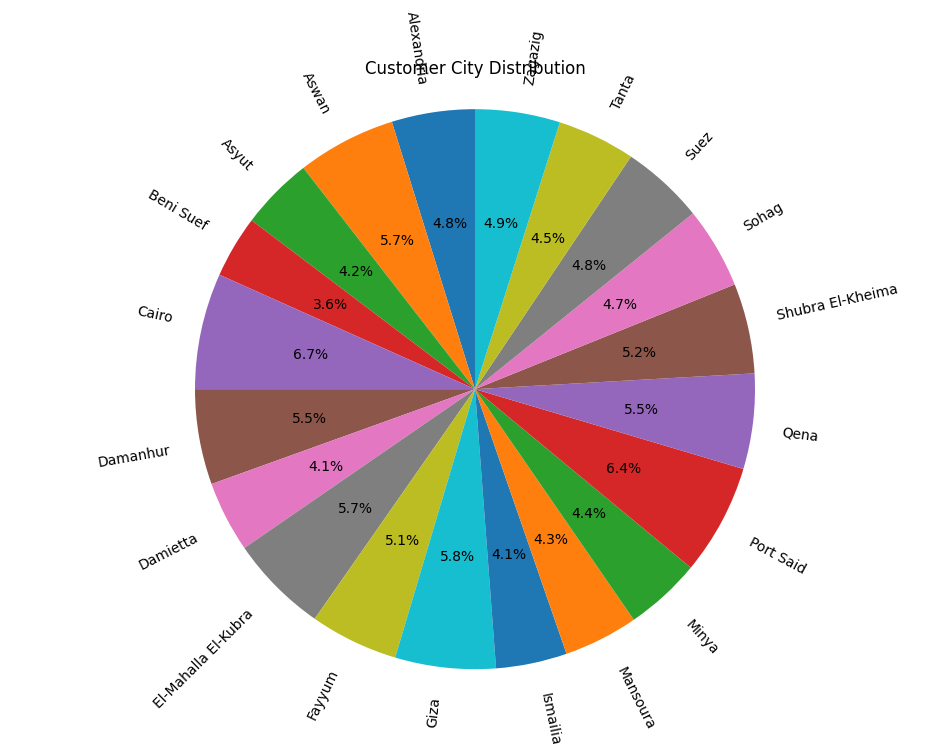

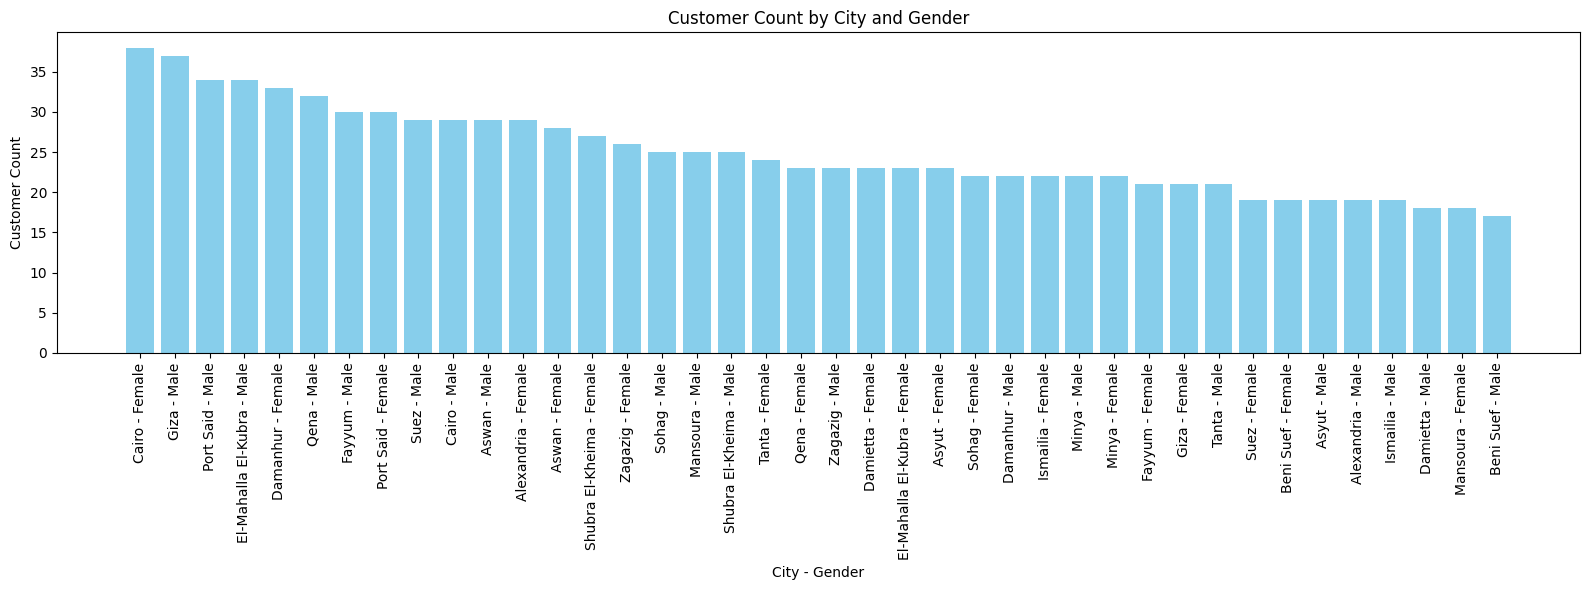

In [78]:


# 2. Pie Chart for City Distribution
city_counts = customer_demographics.groupby('city_name')['customer_count'].sum()
plt.figure(figsize=(12, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90, rotatelabels=True)
plt.title('Customer City Distribution')
plt.axis('equal')
plt.show()


# 3. Combined Bar Chart for City-Gender Demographics
plt.figure(figsize=(16, 6))
sorted_df = customer_demographics.sort_values(by='customer_count', ascending=False)
plt.bar(sorted_df['city_gender'], sorted_df['customer_count'], color='skyblue')
plt.xlabel("City - Gender")
plt.ylabel("Customer Count")
plt.title("Customer Count by City and Gender")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



# Data Analysis Key Findings


* **Gender Distribution:** The customer base was approximately evenly split between Male and Female.  (The exact percentages are shown in the generated pie chart).
* **City Distribution:** Customers are distributed across 20 different cities. (The exact percentages are shown in the generated pie chart).  Some cities have a higher concentration of customers than others.



# time series for customers joining

In [79]:
customers.columns

Index(['customer_id', 'join_date', 'city_id', 'gender_id', 'city_name',
       'gender_name', 'join_year', 'join_month', 'join_day'],
      dtype='object')

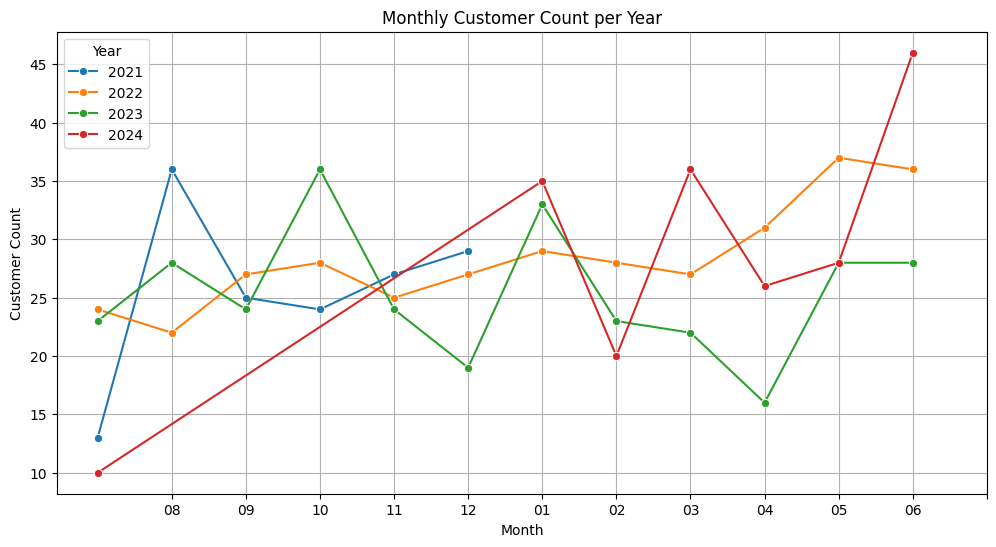

In [80]:
plt.figure(figsize=(12, 6))
time_series = customers.groupby(['join_year', 'join_month']).size().reset_index(name='count')

# Use Seaborn lineplot to plot each year's trend separately
sns.lineplot(
    data=time_series,
    x='join_month',
    y='count',
    hue='join_year',
    marker='o',
    palette="tab10"
)


plt.xlabel("Month")
plt.ylabel("Customer Count")
plt.title("Monthly Customer Count per Year")
plt.xticks(range(1, 13))  # Ensures months are from 1 to 12
plt.legend(title="Year")
plt.grid(True)
plt.show()

Year 2021:
  Month ('2021', '07'): 13
  Month ('2021', '08'): 36
  Month ('2021', '09'): 25
  Month ('2021', '10'): 24
  Month ('2021', '11'): 27
  Month ('2021', '12'): 29
Year 2022:
  Month ('2022', '01'): 29
  Month ('2022', '02'): 28
  Month ('2022', '03'): 27
  Month ('2022', '04'): 31
  Month ('2022', '05'): 37
  Month ('2022', '06'): 36
  Month ('2022', '07'): 24
  Month ('2022', '08'): 22
  Month ('2022', '09'): 27
  Month ('2022', '10'): 28
  Month ('2022', '11'): 25
  Month ('2022', '12'): 27
Year 2023:
  Month ('2023', '01'): 33
  Month ('2023', '02'): 23
  Month ('2023', '03'): 22
  Month ('2023', '04'): 16
  Month ('2023', '05'): 28
  Month ('2023', '06'): 28
  Month ('2023', '07'): 23
  Month ('2023', '08'): 28
  Month ('2023', '09'): 24
  Month ('2023', '10'): 36
  Month ('2023', '11'): 24
  Month ('2023', '12'): 19
Year 2024:
  Month ('2024', '01'): 35
  Month ('2024', '02'): 20
  Month ('2024', '03'): 36
  Month ('2024', '04'): 26
  Month ('2024', '05'): 28
  Month ('2

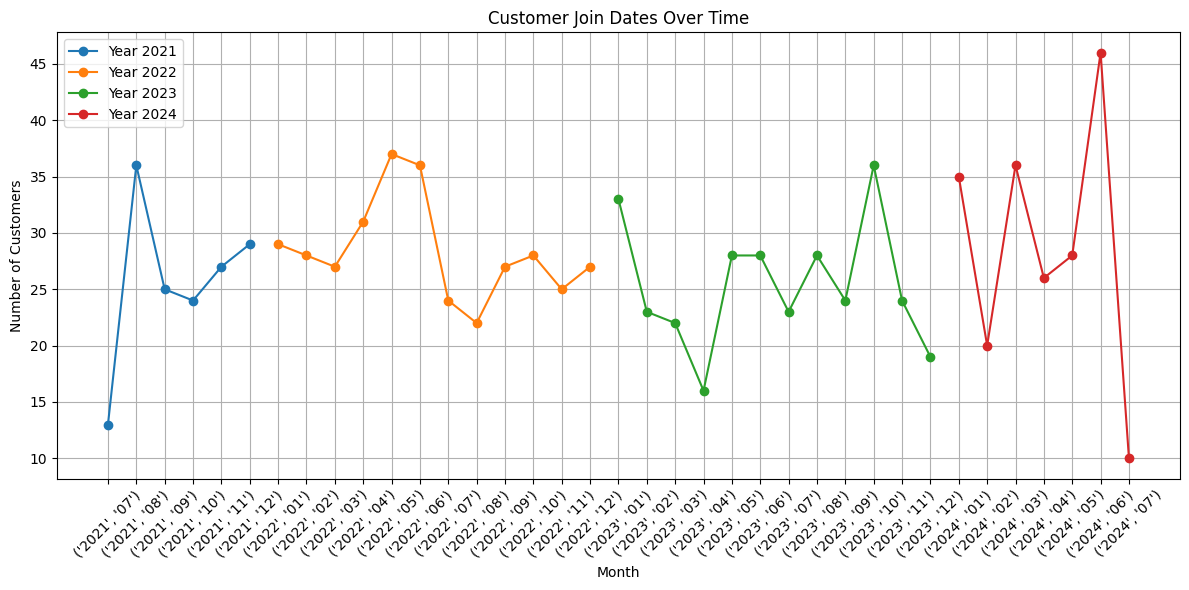

In [81]:


# Group by year and month, then count customers
time_series = customers.groupby([customers['join_year'], customers['join_month']]).size()

# Print the time series data with each year's months on a separate line
for year, month_data in time_series.groupby(level=0):
    print(f"Year {year}:")
    for month, count in month_data.items():
        print(f"  Month {month}: {count}")

# Plotting the time series data
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

for year, month_data in time_series.groupby(level=0):
    # Extract months and counts, converting month tuples to strings
    months = [str(month) for month, count in month_data.items()]
    counts = [count for month, count in month_data.items()]
    plt.plot(months, counts, label=f'Year {year}', marker='o')  # Plot each year's data as a separate line


plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Customer Join Dates Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Year 2021: 0.00% growth
Year 2022: 121.43% growth
Year 2023: -10.85% growth
Year 2024: -33.88% growth


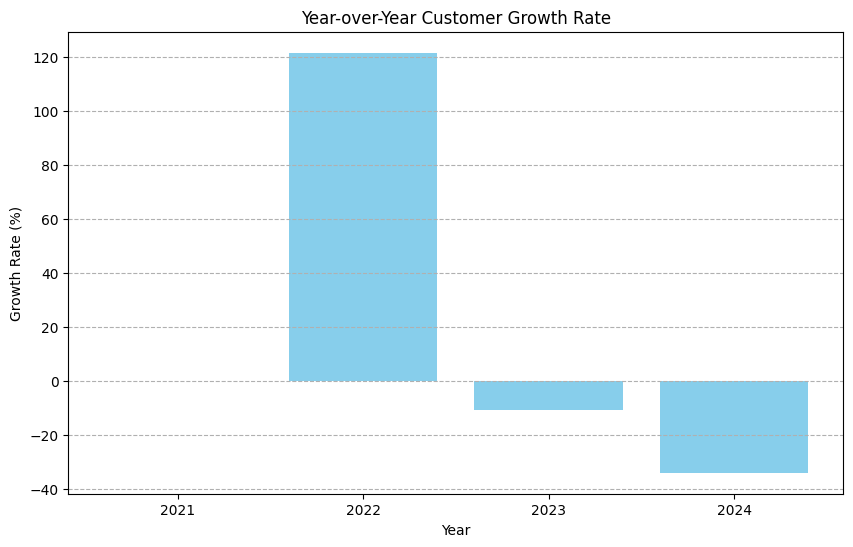

In [82]:

# Calculate year-over-year growth rate
growth_rates = {}
for year in sorted(time_series.index.get_level_values(0).unique()):
    # Convert year to integer before subtraction and comparison
    year_int = int(year)
    # Convert all unique years to integers for comparison
    unique_years_int = [int(y) for y in time_series.index.get_level_values(0).unique()]
    if year_int > min(unique_years_int): # Compare with minimum of integer years
        current_year_total = time_series.loc[year].sum()
        previous_year_total = time_series.loc[str(year_int - 1)].sum()  # Convert back to string for indexing
        growth_rate = ((current_year_total - previous_year_total) / previous_year_total) * 100
        growth_rates[year] = growth_rate
    else:
      growth_rates[year] = 0

# Print the calculated growth rates
for year, rate in growth_rates.items():
    print(f"Year {year}: {rate:.2f}% growth")

# Plotting the growth rates
years = list(growth_rates.keys())
rates = list(growth_rates.values())

plt.figure(figsize=(10, 6))
plt.bar(years, rates, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Year-over-Year Customer Growth Rate')
plt.xticks(years)  # Ensure x-axis ticks are aligned with the years
plt.grid(axis='y', linestyle='--')  # Add grid lines for better readability
plt.show()

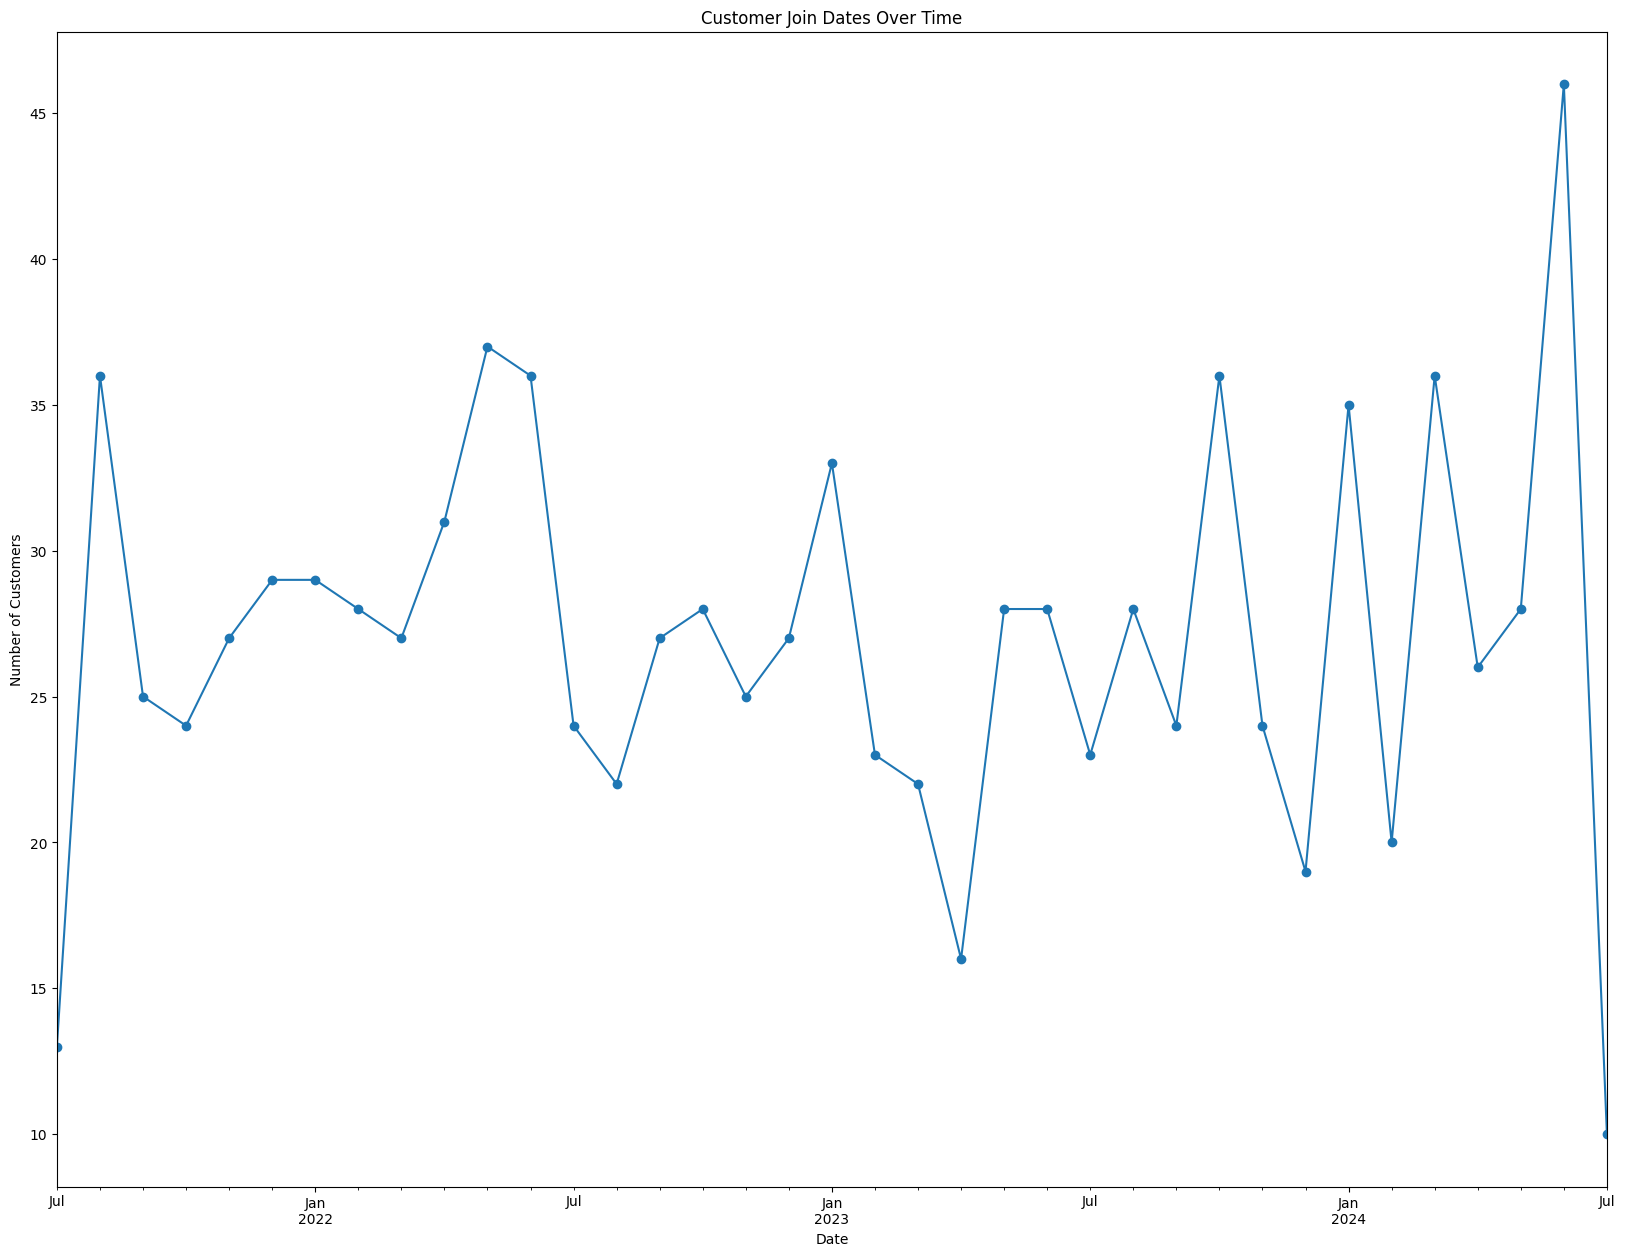

In [83]:
#time-series analysis of customer join dates
customers['join_date'] = pd.to_datetime(customers['join_date'])
time_series = customers.groupby(customers['join_date'].dt.to_period('M')).size()
plt.figure(figsize=(20, 15))
time_series.plot(kind='line', marker='o', title='Customer Join Dates Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.show()

# 2. Coupon Usage Insights:

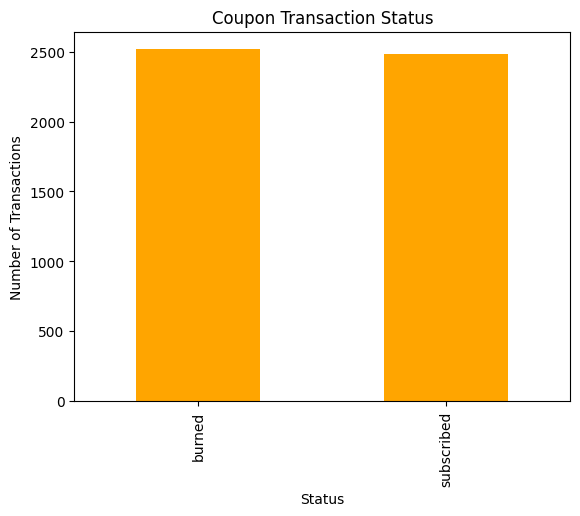

In [84]:
# 2. Coupon Usage Insights
# Transaction Status Breakdown
status_dist = transactions['transaction_status'].value_counts()
status_dist.plot(kind='bar', color='orange', title='Coupon Transaction Status')
plt.xlabel('Status')
plt.ylabel('Number of Transactions')
plt.show()



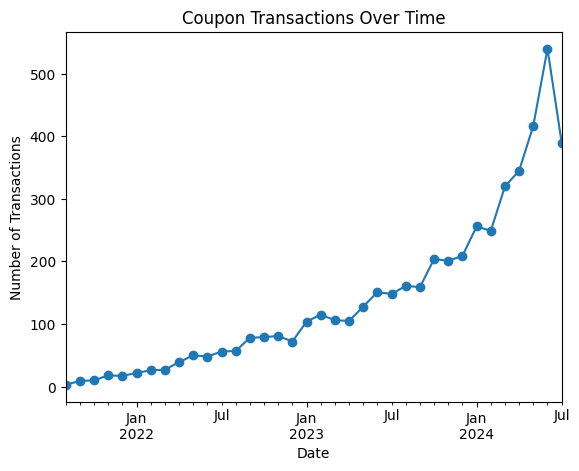

In [85]:
# Time Series Analysis
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
time_series = transactions.groupby(transactions['transaction_date'].dt.to_period('M')).size()
time_series.plot(kind='line', marker='o', title='Coupon Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

In [101]:


# Convert date columns to datetime objects
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
transactions['burn_date'] = pd.to_datetime(transactions['burn_date'])
customers['join_date'] = pd.to_datetime(customers['join_date'])

# Extract year, month, and day from date columns
transactions['transaction_year'] = transactions['transaction_date'].dt.year
transactions['transaction_month'] = transactions['transaction_date'].dt.month
transactions['transaction_day'] = transactions['transaction_date'].dt.day

transactions['burn_year'] = transactions['burn_date'].dt.year
transactions['burn_month'] = transactions['burn_date'].dt.month
transactions['burn_day'] = transactions['burn_date'].dt.day

customers['join_year'] = customers['join_date'].dt.year
customers['join_month'] = customers['join_date'].dt.month
customers['join_day'] = customers['join_date'].dt.day


In [102]:
# merge two tables

# Merge customers and transactions tables
merged_df = pd.merge(customers, transactions, on='customer_id', how='inner')

# Display the merged table
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         5000 non-null   int64         
 1   join_date           5000 non-null   datetime64[ns]
 2   city_id             5000 non-null   int64         
 3   gender_id           5000 non-null   int64         
 4   city_name           5000 non-null   object        
 5   gender_name         5000 non-null   object        
 6   join_year           5000 non-null   int32         
 7   join_month          5000 non-null   int32         
 8   join_day            5000 non-null   int32         
 9   transaction_id      5000 non-null   int64         
 10  transaction_date    5000 non-null   datetime64[ns]
 11  transaction_status  5000 non-null   object        
 12  coupon_name         5000 non-null   object        
 13  burn_date           2516 non-null   datetime64[n

---------------------------------------------------------------------------------

In [103]:
transactions['coupon_name'].value_counts()

,count
coupon_name,
uNY-568,1
lCa-763,1
JCY-213,1
DSY-050,1
xFH-194,1
...,...
EeL-568,1
AQe-419,1
Uad-154,1


In [88]:
# handle date columns

# Convert date columns to datetime objects
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
transactions['burn_date'] = pd.to_datetime(transactions['burn_date'])

# Extract year, month, and day from date columns
transactions['transaction_year'] = transactions['transaction_date'].dt.year
transactions['transaction_month'] = transactions['transaction_date'].dt.month
transactions['transaction_day'] = transactions['transaction_date'].dt.day

transactions['burn_year'] = transactions['burn_date'].dt.year
transactions['burn_month'] = transactions['burn_date'].dt.month
transactions['burn_day'] = transactions['burn_date'].dt.day

***no unique values for copouns***

 Answer these questions:

1. How does coupon usage change over time? (Seasonality trends)




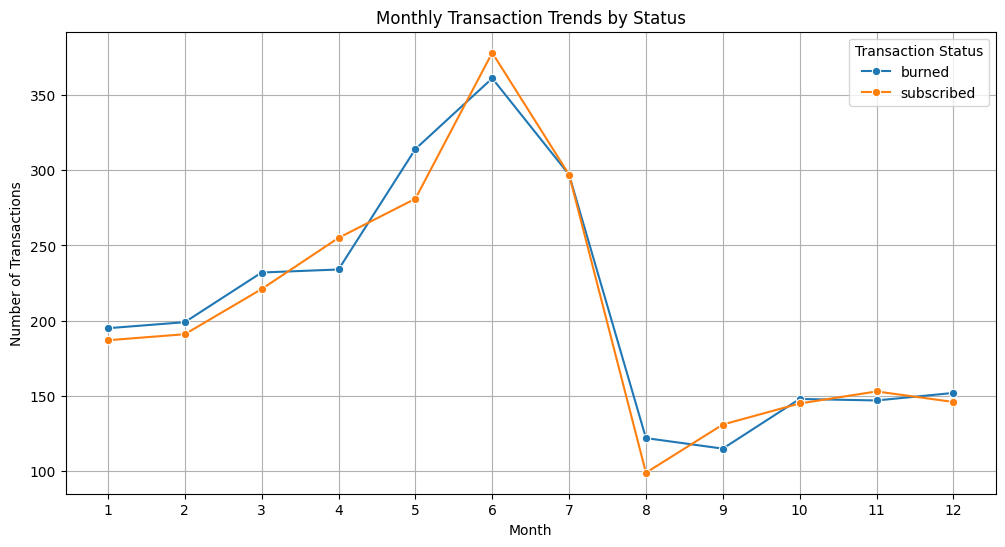

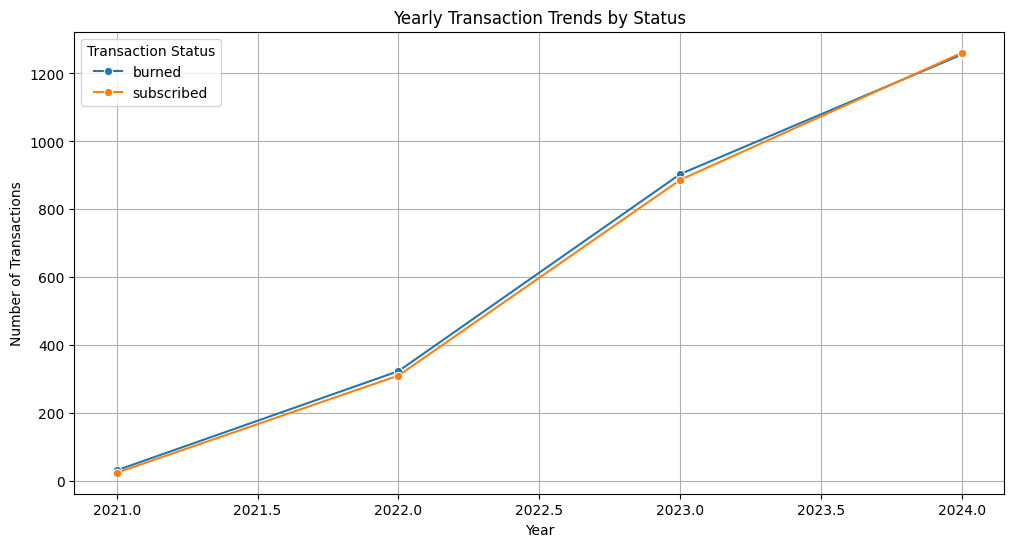

In [104]:
# Q1: How does coupon usage change over time? (Seasonality trends)
monthly_trends = transactions.groupby(['transaction_month','transaction_status'])['transaction_id'].count().reset_index()
yearly_trends = transactions.groupby(['transaction_year','transaction_status'])['transaction_id'].count().reset_index()

#plot results with line
# Plot Monthly Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends, x='transaction_month', y='transaction_id', hue='transaction_status', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transaction Trends by Status')
plt.xticks(range(1, 13))  # Ensure months are shown correctly
plt.grid(True)
plt.legend(title='Transaction Status')
plt.show()

# Plot Yearly Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trends, x='transaction_year', y='transaction_id', hue='transaction_status', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.title('Yearly Transaction Trends by Status')
plt.grid(True)
plt.legend(title='Transaction Status')
plt.show()

<ipython-input-90-395cc3ecccbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burned_transactions['transaction_date'] = pd.to_datetime(burned_transactions['transaction_date'])
<ipython-input-90-395cc3ecccbb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burned_transactions['burn_date'] = pd.to_datetime(burned_transactions['burn_date'])


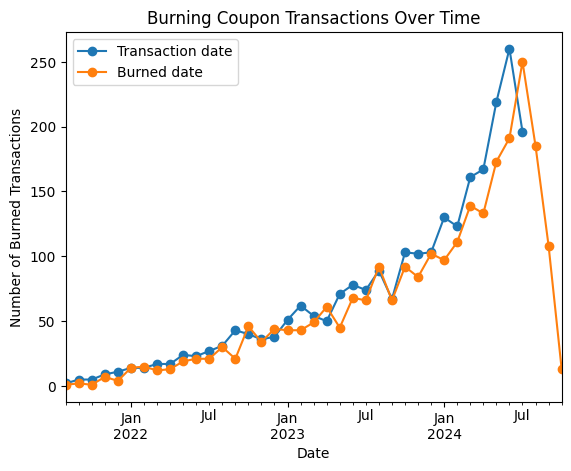

In [90]:

burned_transactions = transactions[transactions['transaction_status'] == 'burned']

# Time Series Analysis for burned transactions
burned_transactions['transaction_date'] = pd.to_datetime(burned_transactions['transaction_date'])
burned_transactions['burn_date'] = pd.to_datetime(burned_transactions['burn_date'])

burned_time_series = burned_transactions.groupby(burned_transactions['transaction_date'].dt.to_period('M')).size()
burned_time_series_date = burned_transactions.groupby(burned_transactions['burn_date'].dt.to_period('M')).size()

burned_time_series.plot(kind='line', marker='o', title='Coupon Transactions Over Time')
burned_time_series_date.plot(kind='line', marker='o', title='Burning Coupon Transactions Over Time')
#distinguish with lables


plt.xlabel('Date')
plt.ylabel('Number of Burned Transactions')
plt.legend(['Transaction date', 'Burned date'])
plt.show()


-----------------------------------------------------------------------------------------------------

# 3. Top-performing Cities and Branches:

In [91]:
merged_df.columns

Index(['customer_id', 'join_date', 'city_id', 'gender_id', 'city_name',
       'gender_name', 'join_year', 'join_month', 'join_day', 'transaction_id',
       'transaction_date', 'transaction_status', 'coupon_name', 'burn_date',
       'branch_id', 'merchant_id', 'merchant_name'],
      dtype='object')

In [92]:

# Find rows where transaction_date equals burn_date
same_date_transactions = transactions[transactions['transaction_date'] == transactions['burn_date']]

# Or, to get the count of such rows:
count_same_date = len(same_date_transactions)
print(f"\nNumber of transactions where transaction_date equals burn_date: {count_same_date}")



Number of transactions where transaction_date equals burn_date: 21


In [105]:
# feature engineering
# sort by customer id then by 'transaction_year','transaction_month', 'transaction_day'
# then calculate time between each transaction and previous one for each customer
# time between transcation and burn time (same dates their divion = 0 but for nan values in burn_date their value will be nan)

merged_df.sort_values(by=['customer_id', 'transaction_date'], inplace=True)
merged_df['time_between_transactions'] = merged_df.groupby('customer_id')['transaction_date'].diff().dt.days
merged_df['time_between_transactions'].fillna(0, inplace=True)
merged_df['time_to_burn'] = (merged_df['burn_date'] - merged_df['transaction_date']).dt.days
merged_df['time_to_burn'].fillna(0, inplace=True)
merged_df.loc[merged_df['transaction_status'] != 'burned', 'time_to_burn'] = np.nan

# now time for subscipion time between transaction_date and end of 2024 year date
merged_df['subscribed_duration'] = (pd.to_datetime('2024-12-31') - merged_df['transaction_date']).dt.days
merged_df['subscribed_duration'].fillna(0, inplace=True)
#make values nan where transaction_status = burned
merged_df.loc[merged_df['transaction_status'] == 'burned', 'subscribed_duration'] = np.nan

merged_df[['customer_id','transaction_status','transaction_date','burn_date','time_between_transactions','time_to_burn','subscribed_duration']].head(60)


<ipython-input-105-8147c581461c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['time_between_transactions'].fillna(0, inplace=True)
<ipython-input-105-8147c581461c>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

,customer_id,transaction_status,transaction_date,burn_date,time_between_transactions,time_to_burn,subscribed_duration
5,1,subscribed,2022-02-14,NaT,0.0,NaN,1051.0
2,1,burned,2022-06-09,2022-07-19,115.0,40.0,NaN
0,1,subscribed,2022-07-30,NaT,51.0,NaN,885.0
3,1,burned,2022-07-30,2022-10-18,0.0,80.0,NaN
1,1,burned,2022-09-19,2022-11-05,51.0,47.0,NaN
4,1,subscribed,2023-03-24,NaT,186.0,NaN,648.0
6,1,subscribed,2024-05-26,NaT,429.0,NaN,219.0
8,2,burned,2023-05-21,2023-05-25,0.0,4.0,NaN
9,2,subscribed,2023-08-04,NaT,75.0,NaN,515.0
7,2,subscribed,2023-10-21,NaT,78.0,NaN,437.0


In [106]:
merged_df['branch_id'].nunique() , merged_df['city_name'].nunique()

(10, 20)

Answer questions related to branch & city

1. Which cities have the highest number of active coupon users?
2. Which merchants or branches drive the most engagement?
3. Which merchants/branches see the highest coupon redemptions?


In [107]:
# 1️⃣ Which cities have the highest number of active coupon users?
# Filter transactions where coupons were burnt
active_users = merged_df[merged_df['transaction_status'] == 'burned']

# Count unique customers per city
active_users_by_city = active_users.groupby('city_name')['customer_id'].nunique().reset_index()

# Rename columns for clarity
active_users_by_city.columns = ['city_name', 'active_coupon_users']

# Sort cities by active coupon users
active_users_by_city = active_users_by_city.sort_values(by='active_coupon_users', ascending=False)

# Display top 10 cities
print(active_users_by_city)



              city_name  active_coupon_users
13            Port Said                   61
4                 Cairo                   59
9                  Giza                   56
1                 Aswan                   54
14                 Qena                   50
7   El-Mahalla El-Kubra                   49
5              Damanhur                   48
8                Fayyum                   47
19              Zagazig                   44
16                Sohag                   44
15     Shubra El-Kheima                   44
18                Tanta                   42
17                 Suez                   42
11             Mansoura                   42
0            Alexandria                   41
12                Minya                   41
2                 Asyut                   39
6              Damietta                   38
10             Ismailia                   36
3             Beni Suef                   32


In [108]:
# 2️⃣ Which merchants or branches drive the most engagement?

# Count total transactions per merchant
merchant_engagement = merged_df.groupby('merchant_name')['transaction_id'].count().reset_index()

# Count total transactions per branch
branch_engagement = merged_df.groupby('branch_id')['transaction_id'].count().reset_index()

# Rename columns for clarity
merchant_engagement.columns = ['merchant_name', 'total_transactions']
branch_engagement.columns = ['branch_id', 'total_transactions']

# Sort merchants and branches by engagement
merchant_engagement = merchant_engagement.sort_values(by='total_transactions', ascending=False)
branch_engagement = branch_engagement.sort_values(by='total_transactions', ascending=False)

# Display top 10 merchants , Display top 10 branches
merchant_engagement.head(10) , branch_engagement.head(10)


(                    merchant_name  total_transactions
 7                   Thomas-Nelson                1032
 1                    Butler-Gomez                1001
 6     Smith, Lawson and Hernandez                 527
 0                  Berry-Anderson                 496
 3                 Griffin-Leblanc                 496
 2  Campbell, Shaffer and Martinez                 489
 5                   Medina-Foster                 487
 4                       Lewis LLC                 472,
    branch_id  total_transactions
 0          1                 527
 9         10                 526
 5          6                 507
 8          9                 506
 6          7                 496
 7          8                 496
 3          4                 494
 4          5                 489
 2          3                 487
 1          2                 472)

In [109]:
# merging of branch ----> merchant
branch_merchant_performance = merged_df.groupby(['branch_id', 'merchant_name'])['transaction_id'].count().reset_index()
branch_merchant_performance.columns = ['branch_id', 'merchant_name', 'total_transactions']
branch_merchant_performance.sort_values(by='total_transactions', ascending=False)



,branch_id,merchant_name,total_transactions
0,1,"Smith, Lawson and Hernandez",527
9,10,Thomas-Nelson,526
5,6,Butler-Gomez,507
8,9,Thomas-Nelson,506
6,7,Berry-Anderson,496
7,8,Griffin-Leblanc,496
3,4,Butler-Gomez,494
4,5,"Campbell, Shaffer and Martinez",489
2,3,Medina-Foster,487
1,2,Lewis LLC,472


In [110]:
# 3️⃣ Which merchants/branches see the highest coupon redemptions?

branch_merchant_redemptions = merged_df[merged_df['transaction_status'] == 'burned'].groupby(['branch_id', 'merchant_name'])['transaction_id'].count().reset_index()
branch_merchant_redemptions.columns = ['branch_id', 'merchant_name', 'total_redemptions']
branch_merchant_redemptions.sort_values(by='total_redemptions', ascending=False)


,branch_id,merchant_name,total_redemptions
9,10,Thomas-Nelson,268
0,1,"Smith, Lawson and Hernandez",266
5,6,Butler-Gomez,266
8,9,Thomas-Nelson,265
2,3,Medina-Foster,257
4,5,"Campbell, Shaffer and Martinez",250
6,7,Berry-Anderson,238
3,4,Butler-Gomez,236
7,8,Griffin-Leblanc,236
1,2,Lewis LLC,234


Time-series performance of cities , branches

In [111]:

# first see performance in each branch over years , (number of burned , not burned)

branch_performance = merged_df.groupby(['branch_id', 'transaction_year'])['transaction_status'].value_counts().unstack().fillna(0)
# then see performance in each city over years , (number of burned , not burned)
city_performance = merged_df.groupby(['city_name', 'transaction_year'])['transaction_status'].value_counts().unstack().fillna(0)
city_performance


transaction_status           burned  subscribed
city_name  transaction_year                    
Alexandria 2021                 0.0         1.0
           2022                17.0        13.0
           2023                44.0        53.0
           2024                61.0        53.0
Aswan      2021                 6.0         2.0
...                             ...         ...
Tanta      2024                61.0        59.0
Zagazig    2021                 3.0         2.0
           2022                17.0        19.0
           2023                41.0        33.0
           2024                48.0        51.0

[79 rows x 2 columns]

<ipython-input-112-f0b16c77f557>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="magma")


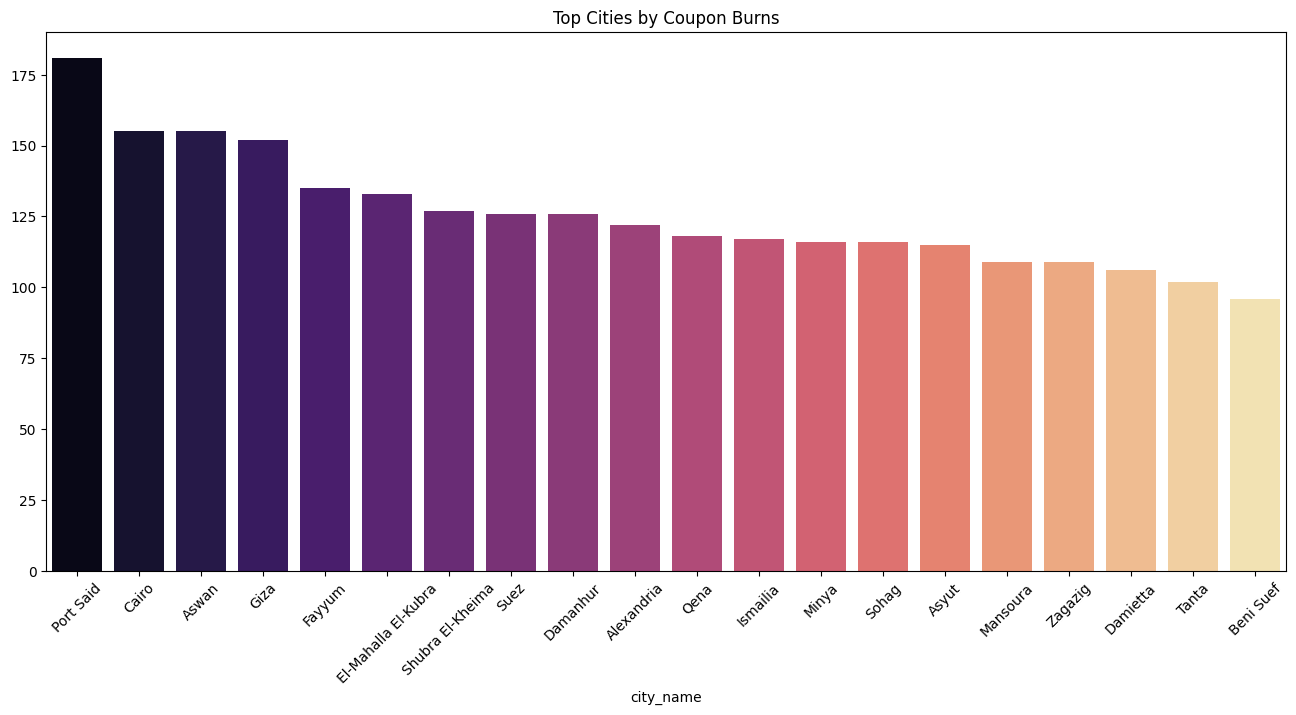

In [112]:
# Top cities by coupon burns
burnt_transactions = merged_df[merged_df['transaction_status'] == 'burned']
top_cities = burnt_transactions.groupby('city_name')['transaction_id'].count().sort_values(ascending=False)

plt.figure(figsize=(16,7))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Top Cities by Coupon Burns")
plt.show()


<ipython-input-113-639218cbfb4b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


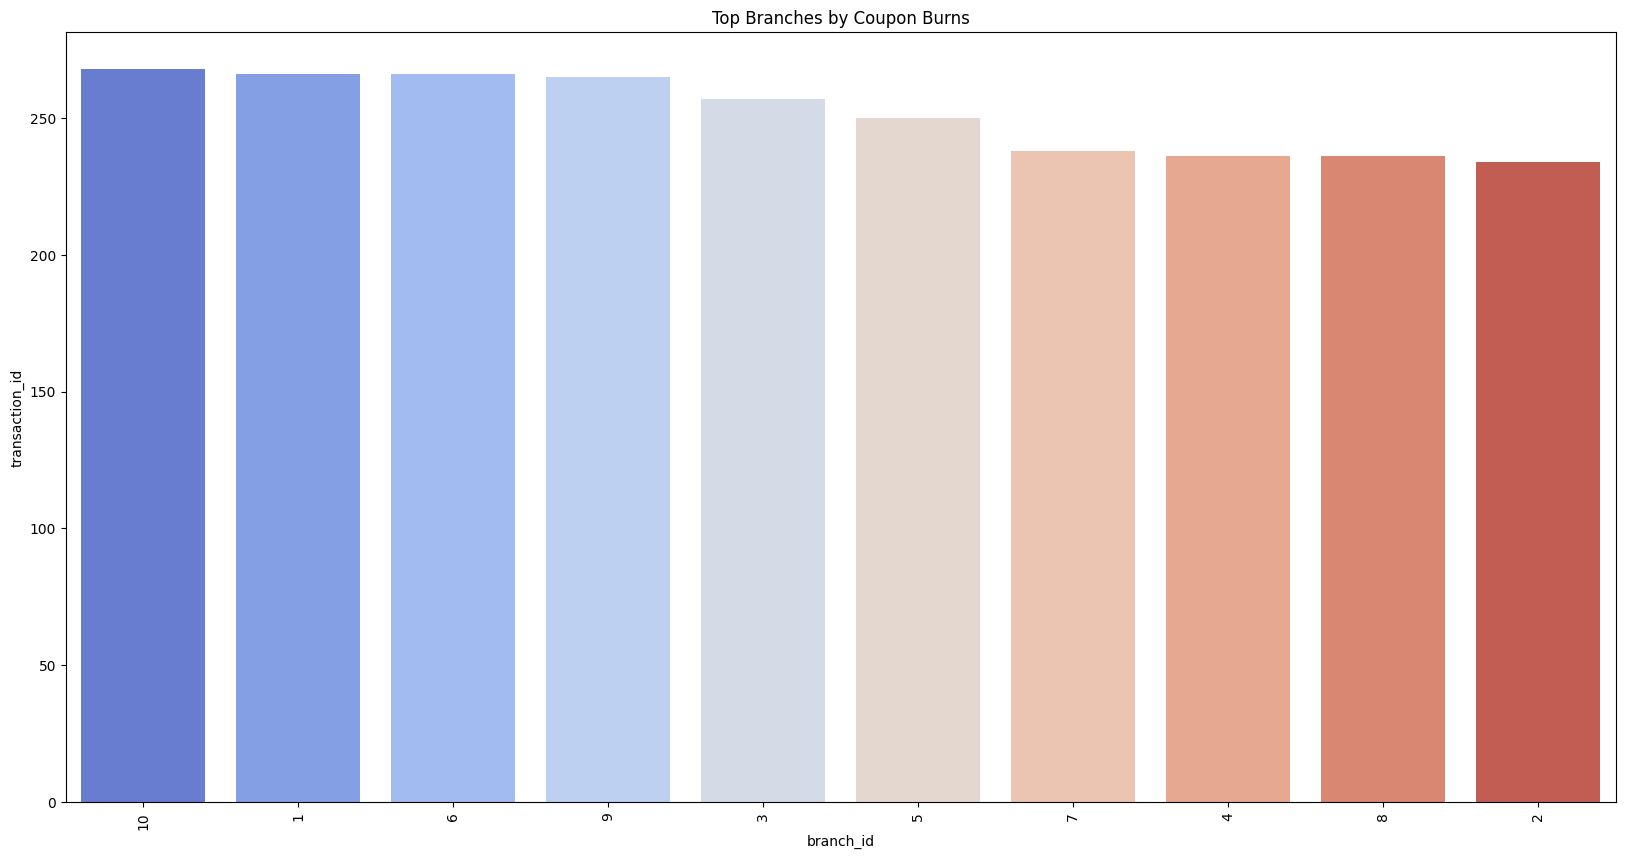

In [113]:

# Top branches by coupon burns
top_branches = burnt_transactions.groupby('branch_id')['transaction_id'].count().sort_values(ascending=False)

# Convert the index to a categorical variable to maintain sorting
sorted_branches = top_branches.reset_index()
sorted_branches['branch_id'] = sorted_branches['branch_id'].astype(str)

plt.figure(figsize=(20, 10))

# Use order=sorted_branches['branch_id'] to enforce sorting
sns.barplot(
    x=sorted_branches['branch_id'],
    y=sorted_branches['transaction_id'],
    palette="coolwarm",
    order=sorted_branches['branch_id']  # Ensures sorting is maintained
)

plt.title("Top Branches by Coupon Burns")
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()


# 4. Customer Retention and Loyalty:

Answer these questions to analyse copoun usage amoung customers:

1. Are there customers who claim but never burn coupons?
2. How long do customers stay active after joining?
3. What factors contribute to high coupon burn rates?                                                      
4. How frequently do customers redeem (burn) coupons?
5.Are there loyal customers who consistently burn coupons?

In [116]:

# Filter for customers who have burned ALL their coupons
# (Assuming we are comparing against total transactions per customer. Adjust if you have another metric)
all_transactions = transactions.groupby('customer_id')['transaction_id'].count().reset_index()
all_transactions.rename(columns={'transaction_id': 'total_transactions'}, inplace=True)

burned_transactions = transactions[transactions['transaction_status'] == 'burned'].groupby('customer_id')['transaction_id'].count().reset_index().rename(columns={'transaction_id': 'burned_transactions'})
subscribed_transactions = transactions[transactions['transaction_status'] == 'subscribed'].groupby('customer_id')['transaction_id'].count().reset_index().rename(columns={'transaction_id': 'subscribed_transactions'})

# Merge all three datasets
merged_data = (
    all_transactions
    .merge(burned_transactions, on='customer_id', how='left')
    .merge(subscribed_transactions, on='customer_id', how='left')
)



# Fill NaN values (if a customer has no burned or subscribed transactions, set the count to 0)
merged_data.fillna(0, inplace=True)

# Convert transaction counts to integer type
merged_data[['burned_transactions', 'subscribed_transactions']] = merged_data[
    ['burned_transactions', 'subscribed_transactions']
].astype(int)

merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   customer_id              989 non-null    int64
 1   total_transactions       989 non-null    int64
 2   burned_transactions      989 non-null    int64
 3   subscribed_transactions  989 non-null    int64
dtypes: int64(4)
memory usage: 31.0 KB


In [118]:
merged_data.columns

Index(['customer_id', 'total_transactions', 'burned_transactions',
       'subscribed_transactions'],
      dtype='object')

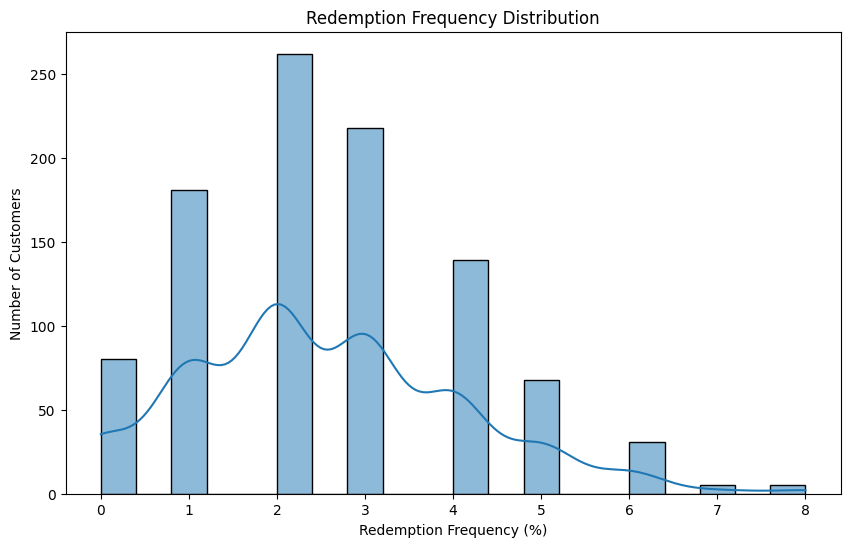

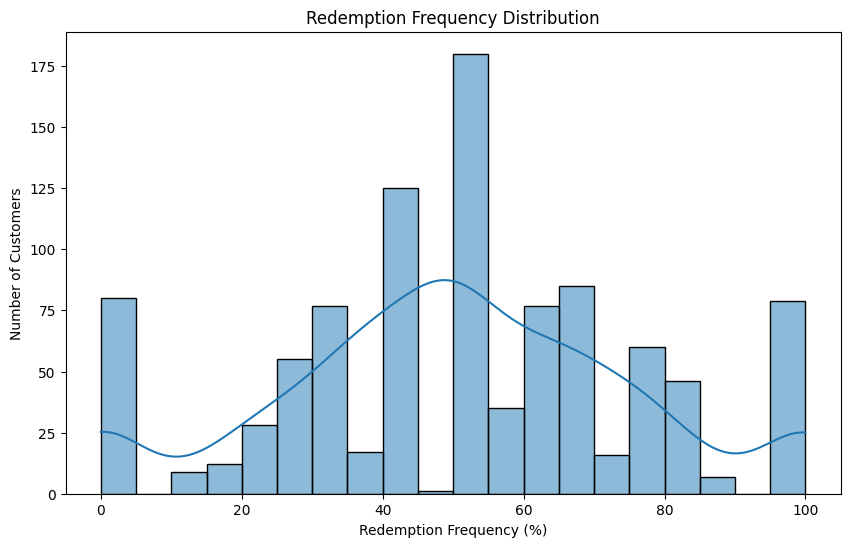

In [119]:
# How frequently do customers redeem (burn) coupons?

# Calculate the redemption frequency (percentage of burned coupons per customer)
merged_data['redemption_frequency'] = (merged_data['burned_transactions'] / merged_data['total_transactions']) * 100
merged_data['no_redemption_frequency'] = (merged_data['subscribed_transactions'] / merged_data['total_transactions']) * 100

# Visualize the redemption frequency distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['burned_transactions'], bins=20, kde=True)
plt.title('Redemption Frequency Distribution')
plt.xlabel('Redemption Frequency (%)')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(merged_data['redemption_frequency'], bins=20, kde=True)
plt.title('Redemption Frequency Distribution')
plt.xlabel('Redemption Frequency (%)')
plt.ylabel('Number of Customers')
plt.show()


In [120]:

# Display summary statistics
merged_data.describe()  # Check min, max, mean, and percentiles


,customer_id,total_transactions,burned_transactions,subscribed_transactions,redemption_frequency,no_redemption_frequency
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,500.672396,5.055612,2.543984,2.511628,50.497908,49.502092
std,288.338824,2.273759,1.557058,1.606892,25.590996,25.590996
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,251.000000,3.000000,1.000000,1.000000,33.333333,33.333333
50%,500.000000,5.000000,2.000000,2.000000,50.000000,50.000000
75%,751.000000,6.000000,4.000000,3.000000,66.666667,66.666667
max,1000.000000,14.000000,8.000000,9.000000,100.000000,100.000000


In [121]:
# Q2: Are there loyal customers who consistently burn coupons?

loyal_customers = merged_data[merged_data['redemption_frequency'] == 100]  # Customers who burnt all coupons
print(f"Number of loyal customers: {len(loyal_customers)}")


Number of loyal customers: 79


In [122]:
# Q3: Are there customers who claim but never burn coupons?
non_active_customers = merged_data[(merged_data['burned_transactions'] == 0) & (merged_data['total_transactions'] != 0)]
print(f"Number of non-active customers: {len(non_active_customers)}")

Number of non-active customers: 80


In [123]:
merged_df.to_csv('full_merge.csv', index=False)
merged_data.to_csv('customer_performance.csv', index=False)

----------------------------------------------------------------------------------------------------

time related

In [115]:
# Q4: How long do customers stay active after joining?
avg_active_days = merged_df['subscribed_duration'].mean()
print(f"Average Active Days: {avg_active_days} days")

Average Active Days: 432.194847020934 days


In [ ]:

# Retention: Time between join date and last transaction
customers['join_date'] = pd.to_datetime(customers['join_date'])
last_transactions = transactions.groupby('customer_id')['transaction_date'].max()
customer_lifetime = (last_transactions - customers.set_index('customer_id')['join_date']).dt.days
customer_lifetime


In [ ]:

plt.figure(figsize=(8,4))
sns.histplot(customer_lifetime, bins=20, kde=True)
plt.title("Customer Lifetime Distribution")
plt.xlabel("Days Active")
plt.show()

In [ ]:
# Count how many months each customer has burned at least one coupon
loyal_customers = transactions[transactions['transaction_status'] == 'burned'] \
    .groupby(['customer_id', 'transaction_month'])['transaction_id'].count().reset_index()

# Count unique months per customer
loyal_customers = loyal_customers.groupby('customer_id')['transaction_month'].nunique().reset_index()
loyal_customers.rename(columns={'transaction_month': 'active_months'}, inplace=True)

# Identify loyal customers (e.g., customers who burned coupons in more than 6 months)
loyal_customers = loyal_customers[loyal_customers['active_months'] > 6]

print(f"Total Loyal Customers: {loyal_customers.shape[0]}")

# Display top loyal customers
print(loyal_customers.sort_values(by='active_months', ascending=False).head(10))


In [ ]:
# What factors contribute to high coupon burn rates?
# Cities with high burn rates , Merchants with high burn rates , Subscription duration impact
